In [ ]:
!pip install spacepy

In [ ]:
!dpkg -l | grep cdf

ii  libnetcdf-dev                             1:4.8.1-1                               amd64        creation, access, and sharing of scientific data
ii  libnetcdf19:amd64                         1:4.8.1-1                               amd64        Interface for scientific data access to large binary data


In [ ]:
!find / -name "libnetcdf.*" -type f 2>/dev/null

/usr/lib/x86_64-linux-gnu/libnetcdf.settings
/usr/lib/x86_64-linux-gnu/libnetcdf.so.19


In [ ]:
cdf_lib_path = os.environ.get("CDF_LIB")

In [ ]:
cdf_lib_path

'/usr/lib/x86_64-linux-gnu/'

In [ ]:
import os

os.environ["CDF_LIB"] = cdf_lib_path

import spacepy.pycdf as spcdf
import csv

Exception: ignored

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.1 MB/s eta 0:00:00


In [ ]:
import netCDF4 as nc
import csv

# Open the NetCDF file for reading
netcdf_file = '/it_pop_dscovr_s20160101000000_e20160101235959_p20160102013127_emb.nc'
dataset = nc.Dataset(netcdf_file, 'r')

# Create a CSV file for writing
csv_file = '/it_pop_dscovr_s20160101000000_e20160101235959_p20160102013127_emb.csv'

# Initialize a CSV writer
with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Iterate through all variables in the NetCDF file
    for var_name in dataset.variables:
        variable = dataset.variables[var_name][:]

        # Write the variable data to the CSV file
        csv_writer.writerow([var_name])  # Write variable name as header
        if isinstance(variable, float):
            variable = [variable]

        csv_writer.writerows([variable])

print(f"Data from {netcdf_file} has been saved to {csv_file}")

Data from /it_pop_dscovr_s20160101000000_e20160101235959_p20160102013127_emb.nc has been saved to /it_pop_dscovr_s20160101000000_e20160101235959_p20160102013127_emb.csv


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/it_pop_dscovr_s20160101000000_e20160101235959_p20160102013127_emb.csv")

In [ ]:
data

In [ ]:
!wget -r -l1 -np -nd -nc http://cdaweb.gsfc.nasa.gov/pub/software/cdf/dist/latest-release/linux/ -A cdf*-dist-all.tar.gz
!tar xf cdf*-dist-all.tar.gz -C ./
!cd cdf*dist

In [ ]:
!apt install python3.10-venv

In [ ]:
!python -m venv myenv

In [ ]:
!source myenv/bin/activate

In [ ]:
!pip install numpy scipy h5py matplotlib networkx
!apt install build-essential gfortran libncurses5-dev

# DSCOVR AI MODELS

In [ ]:
import pandas as pd
import numpy as np
import gc

## ML MODELS

In [ ]:
dscovr_raw_uncleaned = pd.read_csv("https://opensource.gsfc.nasa.gov/spaceappschallenge/dsc_fc_summed_spectra_2017_v01.zip")

In [ ]:
dscovr_raw_uncleaned.head()

,2017-01-01 00:00:00,-4.17863,-4.51183,-3.52434,0,0.1,0.2,0.3,0.4,0.5,...,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30
0,2017-01-01 00:01:00,-6.06788,-0.379552,-3.49708,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:02:00,-5.83430,-3.039940,-2.98546,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 00:03:00,-5.87318,-3.352910,-2.77476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 00:04:00,-5.81431,-3.305190,-2.59870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 00:05:00,-6.23986,-3.240720,-1.01048,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dscovr_raw_uncleaned.columns = ['date-time', 'GSE_Bx', 'GSE_By', 'GSE_Bz', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50']

In [ ]:
dscovr_raw_uncleaned.head()

,date-time,GSE_Bx,GSE_By,GSE_Bz,V1,V2,V3,V4,V5,V6,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
0,2017-01-01 00:01:00,-6.06788,-0.379552,-3.49708,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:02:00,-5.83430,-3.039940,-2.98546,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 00:03:00,-5.87318,-3.352910,-2.77476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 00:04:00,-5.81431,-3.305190,-2.59870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 00:05:00,-6.23986,-3.240720,-1.01048,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_unprocessed = np.array(dscovr_raw_uncleaned)

In [ ]:
x = 542
raw_unprocessed[x:x+5]

In [ ]:
for i in range(len(raw_unprocessed[:, 4:])):
    ct = 0
    for j in raw_unprocessed[i]:
        if j != 0.0:
            ct = 1
    if ct != 1:
        print(i)

In [ ]:
for i in range(len(raw_unprocessed[:, 4:])):
    ct = 0
    for j in raw_unprocessed[i]:
        if j != 0.0:
            ct = 1
    if ct != 1:
        raw_unprocessed = np.delete(raw_unprocessed, (i), axis=0)

In [ ]:
raw_unprocessed

## WIND data

### Code to convert CDF to CSV

In [ ]:
!pip install cdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import cdflib
import pandas as pd

In [ ]:
"https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2016/wi_h1_swe_20160101_v01.cdf"

In [ ]:
def cdf_to_csv(data_link, date):
    link_to_data = data_link
    wind_L1_uncleaned = cdflib.CDF(link_to_data)
    zVariables = wind_L1_uncleaned.cdf_info().zVariables

    data_dict = {}
    for i in zVariables:
        data_dict[i] = wind_L1_uncleaned.varget(i, startrec=0).tolist()

    wind_L1_frame = pd.DataFrame(data_dict)
    wind_L1_frame.to_csv(f"wind_L1/wind_L1_{date}")

In [ ]:
for year in range(2016, 2024):
    for month in range(1, 13):
        if len(str(month)) == 1:
            month = f"0{month}"
        for day in range(1, 32):
            if len(str(day)) == 1:
                day = f"0{day}"
            # print(year, f"{year}{month}{day}")
            try:
                # print(f"https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/{year}/wi_h1_swe_{year}{month}{day}_v01.cdf")
                cdf_to_csv(f"https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/{year}/wi_h1_swe_{year}{month}{day}_v01.cdf", date=f"{year}{month}{day}")
            except Exception as e:
                print(e)
                print(f"{year}{month}{day}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests

def download(cdf_file_url, local_cdf_file_path):
    try:
        # Send an HTTP GET request to the .cdf file URL
        response = requests.get(cdf_file_url)

        # Check if the request was successful (HTTP status code 200)
        if response.status_code == 200:
            # Write the content of the response to the local .cdf file
            with open(local_cdf_file_path, 'wb') as file:
                file.write(response.content)

            print(f".cdf File downloaded and saved as '{local_cdf_file_path}'")
        else:
            print(f"Failed to download the .cdf file. HTTP status code: {response.status_code}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

for year in range(2016, 2024):
    for month in range(1, 12):
        if len(str(month)) == 1:
            month = str(f"0{month}")
        for day in range(1, 32):
            if len(str(day)) == 1:
                month = str(f"0{day}")

            print(f"{year} {month} {day}")

            # Replace 'cdf_file_url' with the actual URL of the .cdf file you want to download
            cdf_file_url = f'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/{year}/wi_h1_swe_{year}{month}{day}_v01.cdf'

            # Specify the local file path where you want to save the downloaded .cdf file
            local_cdf_file_path = f'/content/drive/MyDrive/WIND_L1/wi_h1_swe_{year}{month}{day}_v01.cdf'

            download(cdf_file_url, local_cdf_file_path)

Streaming output truncated to the last 5000 lines.
2016 09 12
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160912_v01.cdf'
2016 09 13
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160913_v01.cdf'
2016 09 14
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160914_v01.cdf'
2016 09 15
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160915_v01.cdf'
2016 09 16
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160916_v01.cdf'
2016 09 17
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160917_v01.cdf'
2016 09 18
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160918_v01.cdf'
2016 09 19
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160919_v01.cdf'
2016 09 20
.cdf File downloaded and saved as '/content/drive/MyDrive/WIND_L1/wi_h1_swe_20160920_v01.cdf'
2016

In [ ]:
dataframe.keys()

dict_keys(['Epoch1', 'Time1_PB5', 'NUM1_PTS', 'B1F1', 'B1SDF1', 'B1GSE', 'B1SDGSE', 'B1RTN', 'B1SDRTN', 'RANGE1', 'FLAG1', 'ZERO', 'SENS', 'label_time', 'format_time', 'unit_time', 'label_bgse', 'label_bsdgse', 'label_brtn', 'label_bsdrtn'])

In [ ]:
# Multiple links conversion
links = ['https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_faraday/2017/wi_sw-ion-dist_swe-faraday_20170101_v01.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h0/2001/wi_h0_swe_20010101_v02.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2017/wi_h1_swe_20170101_v01.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h3/2017/wi_h3_swe_20170101_v01.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h4/2001/wi_h4_swe_20010101_v01.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_h5/2017/wi_h5_swe_20170101_v01.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_k0/2017/wi_k0_swe_20170101_v01.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_m0/2017/wi_m0_swe_20170101_v01.cdf', 'https://spdf.gsfc.nasa.gov/pub/data/wind/swe/swe_m2/2001/wi_m2_swe_20010101_v01.cdf']

for link in links:
    print(cdf_to_csv(link)[0])
    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        print(cdf_to_csv(link)[1])

### Data visualization

In [ ]:
zVariables

In [ ]:
wind_L1_frame

,fit_flag,Epoch,year,doy,Proton_V_nonlin,Proton_sigmaV_nonlin,Proton_VX_nonlin,Proton_sigmaVX_nonlin,Proton_VY_nonlin,Proton_sigmaVY_nonlin,...,BX,BY,BZ,Ang_dev,dev,xgse,ygse,zgse,ygsm,zgsm
0,2,6.374557e+13,-28,7.000062,464.479828,21.212862,-464.277985,21.221989,1.506155,1.000000,...,3.037228,-1.060920,0.596912,1.113115,0.034925,224.358795,98.832344,-3.960166,95.547783,25.584791
1,2,6.374557e+13,-28,7.001210,465.427917,19.810965,-465.189941,19.820976,0.980961,1.000000,...,3.077110,-1.076238,0.565045,0.842094,0.025670,224.359726,98.831367,-3.959913,95.553658,25.559015
2,2,6.374557e+13,-28,7.002358,465.603821,19.676746,-465.369446,19.686535,0.558222,1.000000,...,3.083234,-1.097669,0.631707,0.649817,0.033164,224.360657,98.830391,-3.959661,95.559792,25.532164
3,2,6.374557e+13,-28,7.003507,464.949524,19.881609,-464.697845,19.892239,1.941906,1.000000,...,3.139166,-0.948078,0.674157,1.772992,0.067677,224.361588,98.829414,-3.959409,95.566185,25.504236
4,3,6.374557e+13,-28,7.004656,465.283325,19.006357,-465.029327,19.016596,0.699499,1.000000,...,2.999108,-1.136965,0.544659,1.635063,0.059154,224.362518,98.828438,-3.959156,95.572853,25.475231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,6,6.374566e+13,-28,7.992718,368.498230,20.740757,-368.390594,20.746773,-8.553625,1.832144,...,3.074206,-1.259887,0.061056,3.140867,0.126926,225.538864,97.868744,-3.749428,94.345757,26.294308
854,1,6.374566e+13,-28,7.995015,374.975189,30.461187,-374.606812,30.490881,-12.551687,3.214730,...,2.260600,-1.978732,-1.060627,2.652399,0.042771,225.540833,97.866455,-3.748910,94.355217,26.250902
855,2,6.374566e+13,-28,7.997313,373.981293,25.252481,-373.591492,25.278545,-10.380844,2.470378,...,2.778050,-1.398672,-0.746888,4.185539,0.047231,225.542892,97.864166,-3.748395,94.365822,26.203140
856,6,6.374566e+13,-28,7.998461,371.575562,21.831017,-371.490814,21.835981,-3.054304,1.000000,...,2.984100,-1.142464,-0.786733,1.508439,0.046356,225.543945,97.863014,-3.748138,94.371552,26.177624


In [ ]:
wind_L1_frame[:25].to_csv("wi_h1_swe_20170101_v01_25.csv")

## Dynamic time warping

In [ ]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512707 sha256=568b8453c82c3c62ce15f292817a0c0a56f7aae035c1b67b02d44113f9779e15
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install dtw

  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5301 sha256=a7266a6dd2e9f283306d27ae70d8847524838036ac9075ed40315ca3e7eafa59
  Stored in directory: /root/.cache/pip/wheels/71/31/62/5e67f6e31521b8cc1652aa58b1ed0c892514d01eeee85fd49c
Successfully built dtw


In [ ]:
import numpy as np
from fastdtw import fastdtw
import matplotlib.pyplot as plt

# Sample nonlinear time series data (replace with your own data)
time_series_1 = np.sin(np.linspace(0, 10, 100))
time_series_2 = np.sin(np.linspace(0.5, 9.5, 100))

# Calculate DTW distance and alignment path
dtw_distance, warp_path = fastdtw(time_series_1, time_series_2)

# Extract the indices for alignment
x_indices, y_indices = zip(*warp_path)

# Plot the two time series
plt.figure(figsize=(8, 4))
plt.plot(time_series_1, label="Time Series 1", marker='o')
plt.plot(time_series_2, label="Time Series 2", marker='o')
plt.legend()

# Plot the DTW alignment mapping
plt.figure(figsize=(8, 4))
plt.plot(x_indices, y_indices, 'b-')
plt.xlabel("Time Series 1 Index")
plt.ylabel("Time Series 2 Index")
plt.title("DTW Alignment Mapping")
plt.grid(True)
plt.show()

# Print the DTW distance
print("DTW Distance:", dtw_distance)


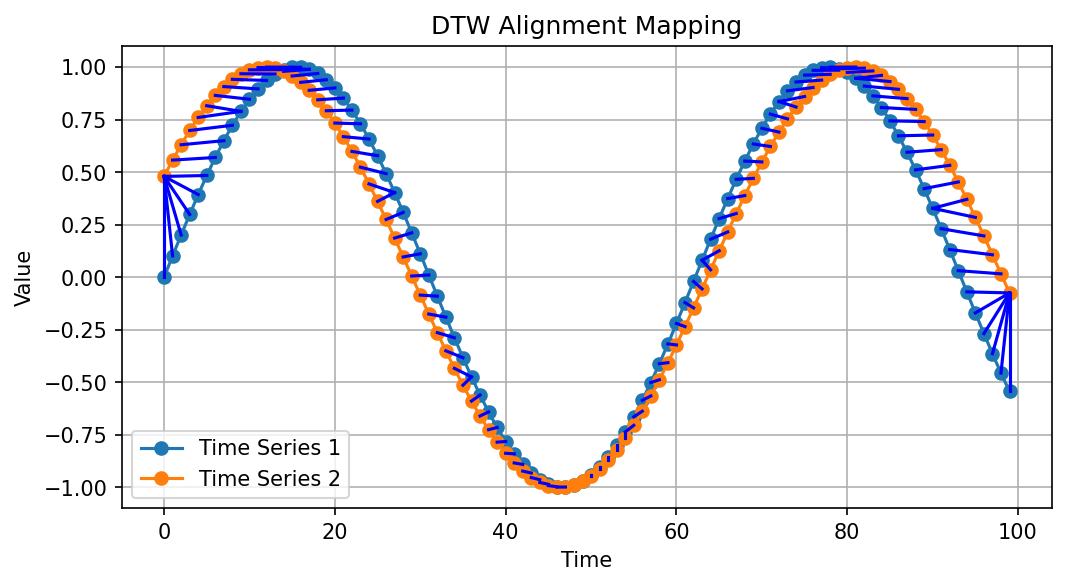

DTW Distance: 4.411116291604295


In [ ]:
import numpy as np
from fastdtw import fastdtw
import matplotlib.pyplot as plt

# Sample nonlinear time series data (replace with your own data)
time_series_1 = np.sin(np.linspace(0, 10, 100))
time_series_2 = np.sin(np.linspace(0.5, 9.5, 100))

# Calculate DTW distance and alignment path
dtw_distance, warp_path = fastdtw(time_series_1, time_series_2)

# Extract the indices for alignment
x_indices, y_indices = zip(*warp_path)

# Create a list of points for mapping
mapping_points = [(x, y) for x, y in zip(x_indices, y_indices)]

# Plot the two time series
plt.figure(figsize=(8, 4))
plt.plot(time_series_1, label="Time Series 1", marker='o')
plt.plot(time_series_2, label="Time Series 2", marker='o')

# Plot the DTW alignment mapping on the same graph
for x, y in mapping_points:
    plt.plot([x, y], [time_series_1[x], time_series_2[y]], 'b-')

plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("DTW Alignment Mapping")
plt.grid(True)
plt.show()

# Print the DTW distance
print("DTW Distance:", dtw_distance)
